# Evaluate SRSF1 binding analysis of RNA-seq profiles

1. Compute bootstrap statistics.
2. Plot distributions.

In [58]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

## Load predicted binding affinities

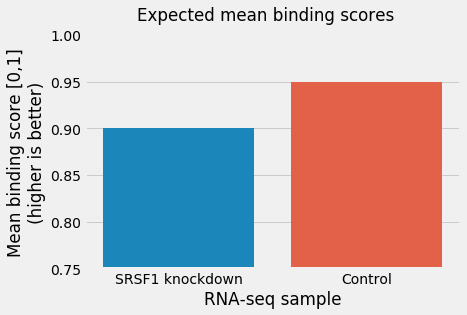

In [135]:
with plt.style.context('fivethirtyeight'):
    sns.barplot(x=['SRSF1 knockdown', 'Control'], y=[0.9, 0.95])
    plt.suptitle('Expected mean binding scores\n')
    plt.ylim(0.75, 1)
    plt.ylabel('Mean binding score [0,1]\n(higher is better)', fontsize='large')
    plt.xlabel('RNA-seq sample', fontsize='large')

In [131]:
def plot_mean_binding_scores(pred_paths, rbp):
    data = []
    
    for p in pred_paths:
        sample = p.split('/')[2].split('.')[0]

        pred = pd.read_csv(p, sep='\t', header=None)[0].values

        # transform such that 0->1 strong->weak binding
        pred = 1 - pred

        # bin data into bootstrap samples
        sample_size = 500
        iterations = 100
        pred = pd.DataFrame(pred.reshape((sample_size, iterations)))

        # Compute harmonic mean
        means = pd.DataFrame(pred.apply(np.mean), columns=['mean'])
        means['sample'] = sample
        data.append(means)

    data = pd.concat(data)

#     palette = sns.color_palette(palette='Set1', n_colors=len(pred_paths))
    with plt.style.context('fivethirtyeight'):
        plt.figure(figsize=(10,7))
        ax = sns.boxplot(x='sample', y='mean', data=data, color='orange', dodge=False, linewidth=2)
        sns.swarmplot(x='sample', y='mean', data=data, color='black', size=7, alpha=0.5, ax=ax)
        plt.suptitle(f'{rbp} estimated mean binding score', size=18)
        plt.xlabel(f'Sample\n(sample size=500, bootstrap iterations=100)')
        plt.ylabel('Mean binding score [0,1]\n(higher is better)')
        plt.legend(bbox_to_anchor=(1,1))

No handles with labels found to put in legend.


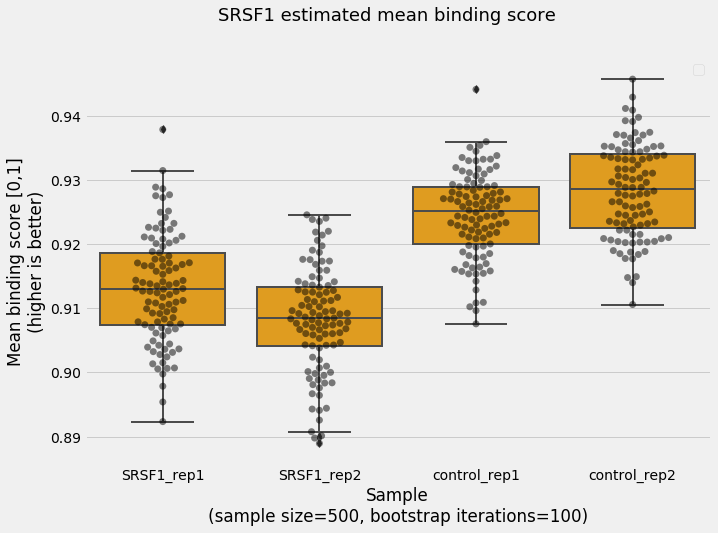

In [132]:
srsf1_pred_paths = ['../results/SRSF1_rep1.n5000_i10.pred.txt',
              '../results/SRSF1_rep2.n5000_i10.pred.txt',
              '../results/control_rep1.n5000_i10.pred.txt',
              '../results/control_rep2.n5000_i10.pred.txt']

plot_mean_binding_scores(srsf1_pred_paths, 'SRSF1')

No handles with labels found to put in legend.


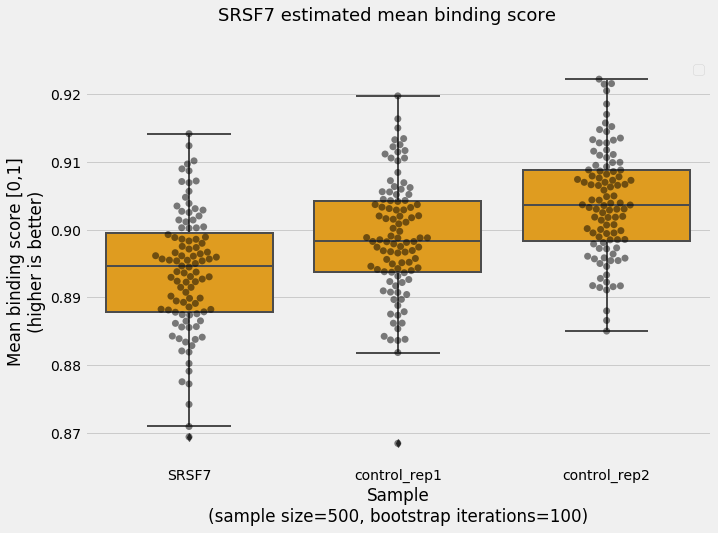

In [133]:
srsf7_pred_paths = ['../results/SRSF7.filt.50000.SRSF7_pred.txt',
                    '../results/control_rep1.filt.50000.SRSF7_pred.txt',
                    '../results/control_rep2.filt.50000.SRSF7_pred.txt']
plot_mean_binding_scores(srsf7_pred_paths, 'SRSF7')

No handles with labels found to put in legend.


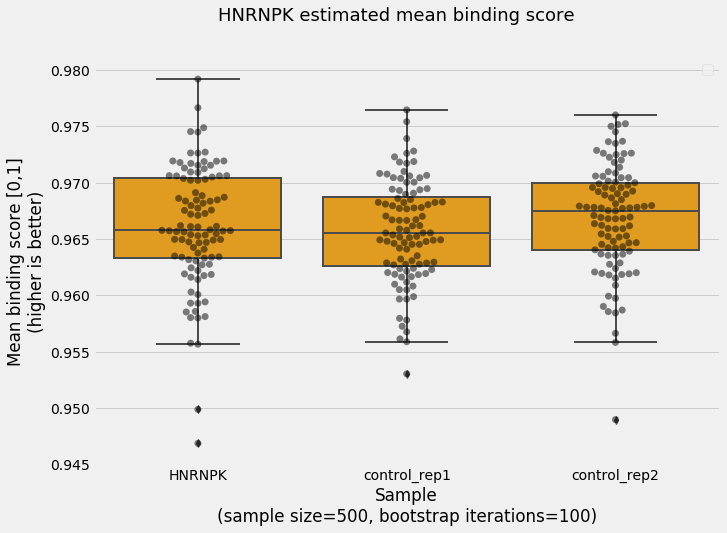

In [134]:
hnrnpk_pred_paths = ['../results/HNRNPK.filt.50000.HNRNPK_pred.txt',
                    '../results/control_rep1.filt.50000.HNRNPK_pred.txt',
                    '../results/control_rep2.filt.50000.HNRNPK_pred.txt']
plot_mean_binding_scores(hnrnpk_pred_paths, 'HNRNPK')